# A2: Data Analysis
Tyler Bevan

Questions 1 through 4 are on a logarithmic Y scale

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set()
artists = pd.read_csv("artists.dat", delimiter="\t").set_index("id")
tags = pd.read_csv("tags.dat", delimiter="\t").set_index("tagID")
user_artists = pd.read_csv("user_artists.dat", delimiter="\t").set_index(["userID", "artistID"])
user_friends = pd.read_csv("user_friends.dat", delimiter="\t").set_index("userID")
user_taggedartists = pd.read_csv("user_taggedartists.dat", delimiter="\t").set_index(["userID", "artistID"])

Question 1: Plot the distribution of play counts per artist

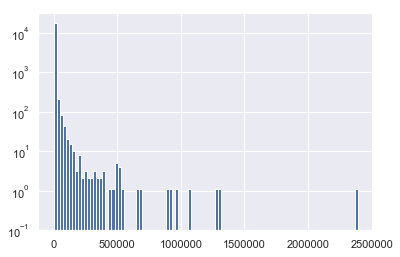

In [20]:
fig, ax = plt.subplots()
user_artists.reset_index().groupby(["artistID"])["weight"].agg("sum").hist(ax=ax, bins=100, bottom=0.1)
ax.set_yscale('log')

Question 2: Plot the distribution of unique users playing each artist

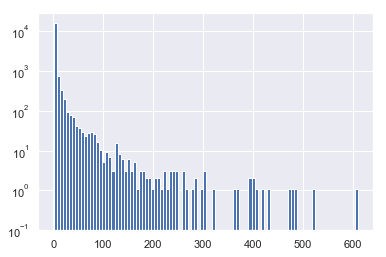

In [21]:
fig, ax = plt.subplots()
user_artists.reset_index().groupby(["artistID"])["userID"].agg("count").hist(ax=ax, bins=100, bottom=0.1)
ax.set_yscale('log')

Question 3: Plot the distribution of play counts per user

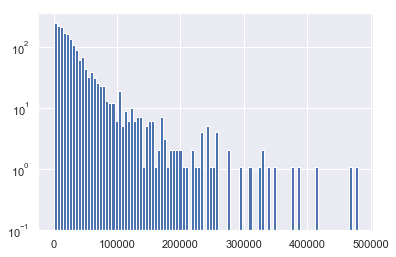

In [22]:
fig, ax = plt.subplots()
user_artists.reset_index().groupby(["userID"])["weight"].agg("sum").hist(ax=ax, bins=100, bottom=0.1)
ax.set_yscale('log')

Question 4: Plot the distribution of unique artists per user

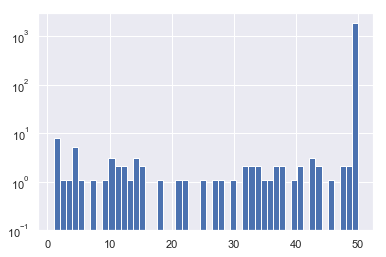

In [23]:
fig, ax = plt.subplots()
user_artists.reset_index().groupby(["userID"])["artistID"].agg("count").hist(ax=ax, bins=50, bottom=0.1)
ax.set_yscale('log')

Question 5: What is the mean artists-per-user? Users-per-artist? Plays per user/artist pair?

In [24]:
print("Mean artists-per-user: {}".format(user_artists.reset_index().groupby(["userID"])["artistID"].agg("count").mean()))
print("Mean users-per-artist: {}".format(user_artists.reset_index().groupby(["artistID"])["userID"].agg("count").mean()))
print("Mean plays per user per artist: {}".format(user_artists["weight"].mean()))

Mean artists-per-user: 49.06659619450317
Mean users-per-artist: 5.265086206896552
Mean plays per user per artist: 745.2439300256372


Question 6: What are the 10 artists with the most plays?

In [25]:
artists.merge(pd.DataFrame(user_artists.reset_index().groupby(["artistID"])["weight"].agg("sum")), left_index=True, right_index=True).sort_values(by=["weight"], ascending=False).head(10)

,name,url,pictureURL,weight
id,,,,
289,Britney Spears,http://www.last.fm/music/Britney+Spears,http://userserve-ak.last.fm/serve/252/60126439...,2393140
72,Depeche Mode,http://www.last.fm/music/Depeche+Mode,http://userserve-ak.last.fm/serve/252/75022.jpg,1301308
89,Lady Gaga,http://www.last.fm/music/Lady+Gaga,http://userserve-ak.last.fm/serve/252/47390093...,1291387
292,Christina Aguilera,http://www.last.fm/music/Christina+Aguilera,http://userserve-ak.last.fm/serve/252/47363849...,1058405
498,Paramore,http://www.last.fm/music/Paramore,http://userserve-ak.last.fm/serve/252/35837991...,963449
67,Madonna,http://www.last.fm/music/Madonna,http://userserve-ak.last.fm/serve/252/340387.jpg,921198
288,Rihanna,http://www.last.fm/music/Rihanna,http://userserve-ak.last.fm/serve/252/53023109...,905423
701,Shakira,http://www.last.fm/music/Shakira,http://userserve-ak.last.fm/serve/252/52116105...,688529
227,The Beatles,http://www.last.fm/music/The+Beatles,http://userserve-ak.last.fm/serve/252/2588646.jpg,662116


Question 7: What are the 10 artists with the most unique playing users?

In [26]:
artists.merge(pd.DataFrame(user_artists.reset_index().groupby(["artistID"])["userID"].agg("count")), left_index=True, right_index=True).sort_values(by=["userID"], ascending=False).head(10)

,name,url,pictureURL,userID
id,,,,
89,Lady Gaga,http://www.last.fm/music/Lady+Gaga,http://userserve-ak.last.fm/serve/252/47390093...,611
289,Britney Spears,http://www.last.fm/music/Britney+Spears,http://userserve-ak.last.fm/serve/252/60126439...,522
288,Rihanna,http://www.last.fm/music/Rihanna,http://userserve-ak.last.fm/serve/252/53023109...,484
227,The Beatles,http://www.last.fm/music/The+Beatles,http://userserve-ak.last.fm/serve/252/2588646.jpg,480
300,Katy Perry,http://www.last.fm/music/Katy+Perry,http://userserve-ak.last.fm/serve/252/42128121...,473
67,Madonna,http://www.last.fm/music/Madonna,http://userserve-ak.last.fm/serve/252/340387.jpg,429
333,Avril Lavigne,http://www.last.fm/music/Avril+Lavigne,http://userserve-ak.last.fm/serve/252/59708309...,417
292,Christina Aguilera,http://www.last.fm/music/Christina+Aguilera,http://userserve-ak.last.fm/serve/252/47363849...,407
190,Muse,http://www.last.fm/music/Muse,http://userserve-ak.last.fm/serve/252/416514.jpg,400


Question 8: Linear Regression Plot

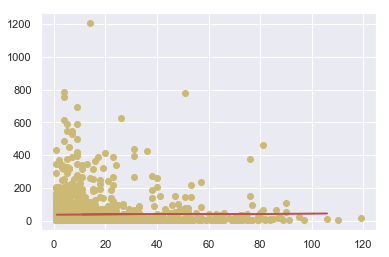

Correlation Matrix:
          friendID  artistID
friendID  1.000000  0.002163
artistID  0.002163  1.000000

intercept: 36.36977511014725
coefficient: 0.06415555116623736


In [59]:
from scipy.stats import linregress
df = pd.DataFrame(user_friends.reset_index().groupby(["userID"])["friendID"].agg("count"))
results = df.merge(pd.DataFrame(user_taggedartists.reset_index().groupby(["userID"])["artistID"].agg(lambda x: x.nunique())), left_index=True, right_index=True).sort_values(by=["friendID"])

X = results["friendID"]
y = results["artistID"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train.values.reshape(-1,1), y_train)
plt.scatter(results["friendID"], results["artistID"], color="y")
plt.plot(X_test, linreg.predict(X_test.values.reshape(-1,1)), color="r")
plt.show()
print("Correlation Matrix:")
print(results.corr())
print()
print("intercept: {}".format(linreg.intercept_))
print("coefficient: {}".format(linreg.coef_[0]))

It appears that there is little correlation between the variables, which indicates that a linear regression is not very reliable. This is mirrored by the poor RMSE, which is more than double the intercept:

In [65]:
from sklearn import metrics
import numpy as np

y_true = results["artistID"].values
y_pred = linreg.predict(results["friendID"].values.reshape(-1,1))
print("RMSE:  {} artists".format(np.sqrt(metrics.mean_squared_error(y_true, y_pred))))

RMSE:  85.33346196150475 artists
